<br></br>
<font size=6 face=雅黑>BERT笔记</font>
<br></br>
<font size=5 face=雅黑>1. 解题思路</font>
<br></br>
使用预训练的BERT模型进行建模的思路步骤如下：
<br></br>
1. 数据预处理：首先，对文本数据进行预处理，包括文本清洗（如去除特殊字符、标点符号）、分词等操作。可以使用常见的NLP工具包（如NLTK或spaCy）来辅助进行预处理。
2. 构建训练所需的dataloader与dataset，构建Dataset类时，需要定义三个方法__init__，__getitem__， __len__，其中__init__方法完成类初始化，__getitem__要求返回返回内容和label，__len__方法返回数据长度
3. 构造Dataloader，在其中完成对句子进行编码、填充、组装batch等动作：
4. 定义预测模型利用预训练的BERT模型来解决文本二分类任务，我们将使用BERT模型编码中的[CLS]向量来完成二分类任务
[CLS]就是classification的意思，可以理解为用于下游的分类任务。
<br></br>
主要用于以下两种任务：
<br></br>
  单文本分类任务：对于文本分类任务，BERT模型在文本前插入一个[CLS]符号，并将该符号对应的输出向量作为整篇文本的语义表示，用于文本分类，如下图所示。可以理解为：与文本中已有的其它字/词相比，这个无明显语义信息的符号会更“公平”地融合文本中各个字/词的语义信息。
<br></br>
  在模型设计中思路就体现为我们取出文本数据经过向量化后的[CLS]向量，然后经过二分类预测层得到最终的结果
<br></br>

In [ ]:
outputs = self.bert(**src).last_hidden_state[:, 0, :]
self.predictor(outputs)
self.predictor = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

<br></br>
5. 模型训练和评估：使用训练集对选定的机器学习模型进行训练，然后使用测试集进行评估。评估指标可以选择准确率、精确率、召回率、F1值等。   
6. 调参优化：如果模型效果不理想，可以尝试调整特征提取的参数（如词频阈值、词袋大小等）或机器学习模型的参数，以获得更好的性能。
<br></br>
在这个进阶实践中，我们使用深度学习方法，一般会遵循以下流程：
<br></br>
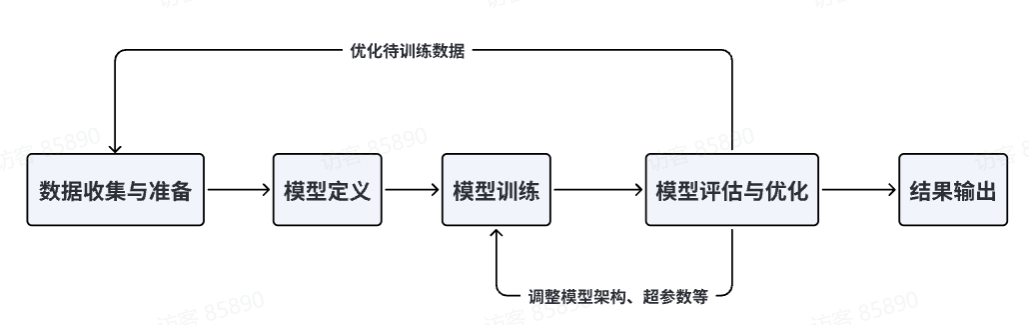
<br></br>
在进阶Baseline中，我们会使用Bert模型，该模型介绍如下：
<br></br>
<font size=5 face=雅黑>2. BERT 简介</font>
<br></br>
BERT，是一个经典的深度学习、预训练模型。2018年，由 Google 团队发布的论文《BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding》提出了预训练模型 BERT（Bidirectional Encoder Representations from Transformers），在自然语言处理领域掀起了巨大浪潮。该模型实现了包括 GLUE、MultiNLI 等七个自然语言处理评测任务的 the-state-of-art（最优表现），堪称里程碑式的成果。自 BERT 推出以来，预训练+微调的模式开始成为自然语言处理任务的主流，标志着各种自然语言处理任务的重大进展以及预训练模型的统治地位建立，一直到去年 ChatGPT 的发布将研究范式带向大语言模型+提示工程，但时至今天，BERT 仍然是自然语言处理领域最常用、最重要的预训练模型之一。
<br></br>
BERT 的模型架构直接使用了 Transformer 的 Encoder 作为整体架构，其最核心的思想在于提出了两个新的预训练任务——MLM（Masked Language Model，掩码模型）和 NSP（Next Sentence Prediction，下个句子预测），而不是沿用传统的 LM（语言模型）。(见 history.ipynb, 此处不再赘述Transformer的发展史）
<br></br>
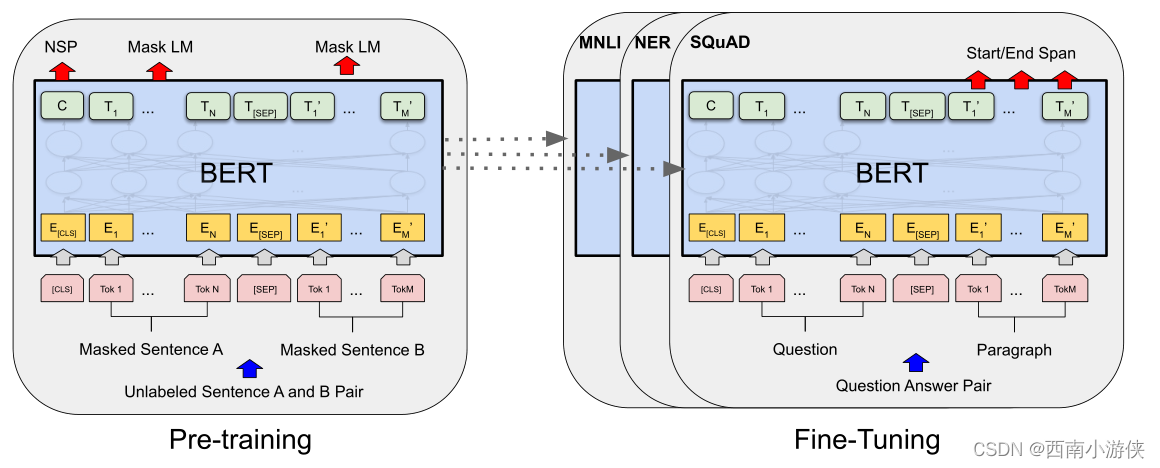
<br></br>
MLM 任务，是 BERT 能够深层拟合双向语义特征的基础。简单来讲，MLM 任务即以一定比例对输入语料的部分 token 进行遮蔽，替换为 （MASK）标签，再让模型基于其上下文预测还原被遮蔽的单词，即做一个完形填空任务。由于在该任务中，模型需要针对 (MASK) 标签左右的上下文信息来预测标签本身，从而会充分拟合双向语义信息。
<br></br>
例如，原始输入为 I like you。以30%的比例进行遮蔽，那么遮蔽之后的输入可能为：I (MASK) you。而模型的任务即为基于该输入，预测出 (MASK) 标签对应的单词为 like。
<br></br>
NSP 任务，是 BERT 用于解决句级自然语言处理任务的预训练任务。BERT 完全采用了预训练+微调的范式，因此着重通过预训练生成的模型可以解决各种多样化的下游任务。MLM 对 token 级自然语言处理任务（如命名实体识别、关系抽取等）效果极佳，但对于句级自然语言处理任务（如句对分类、阅读理解等），由于预训练与下游任务的模式差距较大，因此无法取得非常好的效果。NSP 任务，是将输入语料都整合成句对类型，句对中有一半是连贯的上下句，标记为 IsNext，一半则是随机抽取的句对，标记为 NotNext。模型则需要根据输入的句对预测是否是连贯上下句，即预测句对的标签。
<br></br>
例如，原始输入句对可能是 (I like you ; Because you are so good) 以及 (I like you; Today is a nice day)。而模型的任务即为对前一个句对预测 IsNext 标签，对后一个句对预测 NotNext 标签。
<br></br>
基于上述两个预训练任务，BERT 可以在预训练阶段利用大量无标注文本数据实现深层语义拟合，从而取得良好的预测效果。同时，BERT 追求预训练与微调的深层同步，由于 Transformer 的架构可以很好地支持各类型的自然语言处理任务，从而在 BERT 中，微调仅需要在预训练模型的最顶层增加一个 SoftMax 分类层即可。同样值得一提的是，由于在实际下游任务中并不存在 MLM 任务的遮蔽，因此在策略上进行了一点调整，即对于选定的遮蔽词，仅 80% 的遮蔽被直接遮蔽，其余将有 10% 被随机替换，10% 被还原为原单词。
<br></br>
<font size=5 face=雅黑>3. 导入模块</font>
<br></br>
导入我们本次Baseline代码所需的模块

In [ ]:
#import 相关库
#导入前置依赖
import os
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
# 用于加载bert模型的分词器
from transformers import AutoTokenizer
# 用于加载bert模型
from transformers import BertModel
from pathlib import Path

<br></br>
<font size=5 face=雅黑>4. 设置全局配置</font>
<br></br>

In [ ]:
batch_size = 16
# 文本的最大长度
text_max_length = 128
# 总训练的epochs数，我只是随便定义了个数
epochs = 100
# 学习率
lr = 3e-5
# 取多少训练集的数据作为验证集
validation_ratio = 0.1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 每多少步，打印一次loss
log_per_step = 50

# 数据集所在位置
dataset_dir = Path("./基于论文摘要的文本分类与关键词抽取挑战赛公开数据")
os.makedirs(dataset_dir) if not os.path.exists(dataset_dir) else ''

# 模型存储路径
model_dir = Path("./model/bert_checkpoints")
# 如果模型目录不存在，则创建一个
os.makedirs(model_dir) if not os.path.exists(model_dir) else ''

print("Device:", device)

<br></br>
<font size=5 face=雅黑>5. 数据收集与准备</font>
<br></br>
在赛题主页下载数据，读取数据集，数据预处理（考虑数据扩增）

In [ ]:
# 读取数据集，进行数据处理

pd_train_data = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/train.csv')
pd_train_data['title'] = pd_train_data['title'].fillna('')
pd_train_data['abstract'] = pd_train_data['abstract'].fillna('')

test_data = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/testB.csv')
test_data['title'] = test_data['title'].fillna('')
test_data['abstract'] = test_data['abstract'].fillna('')
pd_train_data['text'] = pd_train_data['title'].fillna('') + ' ' +  pd_train_data['author'].fillna('') + ' ' + pd_train_data['abstract'].fillna('')+ ' ' + pd_train_data['Keywords'].fillna('')
test_data['text'] = test_data['title'].fillna('') + ' ' +  test_data['author'].fillna('') + ' ' + test_data['abstract'].fillna('')

In [ ]:
# 从训练集中随机采样测试集
validation_data = pd_train_data.sample(frac=validation_ratio)
train_data = pd_train_data[~pd_train_data.index.isin(validation_data.index)]

<br></br>
<font size=5 face=雅黑>6. 构建训练所需的dataloader与dataset</font>
<br></br>
<font size=3 face=雅黑>6.1 定义dataset</font>
<br></br>
Pytorch 中自定义dataset需要继承torch.utils.data.Dataset，继承Dataset这个类时，它要求你必须重写__getitem__(self, index)、 __len__(self) 两个方法，前者通过提供索引返回数据，也就是提供 DataLoader获取数据的方式；后者返回数据集的长度，DataLoader依据 len 确定自身索引采样器的长度。
<br></br>
而本次教程中，我们在初始化类方法__init__中引入我们的训练数据，重写__getitem__(self, index)方法，保证能够取出index对应行的text 与label 值，也就是我们训练需要的数据以及训练希望得到的结果，在__len__ 方法中，我们需要返回数据集的总长度，这里直接利用Dataframe数据的len()方法就能完成。

In [ ]:
# 构建Dataset
class MyDataset(Dataset):

    def __init__(self, mode='train'):
        super(MyDataset, self).__init__()
        self.mode = mode
        # 拿到对应的数据
        if mode == 'train':
            self.dataset = train_data
        elif mode == 'validation':
            self.dataset = validation_data
        elif mode == 'test':
            # 如果是测试模式，则返回内容和uuid。拿uuid做target主要是方便后面写入结果。
            self.dataset = test_data
        else:
            raise Exception("Unknown mode {}".format(mode))

    def __getitem__(self, index):
        # 取第index条
        data = self.dataset.iloc[index]
        # 取其内容
        text = data['text']
        # 根据状态返回内容
        if self.mode == 'test':
            # 如果是test，将uuid做为target
            label = data['uuid']
        else:
            label = data['label']
        # 返回内容和label
        return text, label

    def __len__(self):
        return len(self.dataset)


In [ ]:
train_dataset = MyDataset('train')
validation_dataset = MyDataset('validation')

In [ ]:
train_dataset.__getitem__(0)

<br></br>
<font size=3 face=雅黑>6.1 构造Dataloader</font>
<br></br>
在Dataloader中，我们需要利用Dataloader来加载训练数据与训练目标，需要注意的是，加载完成后的数据需要为tensor（张量）形式，因此在下文中我们定义了collate_fn来帮助完成batch组装以及将文本内容向量化，而文本内容向量化这部分内容，我们利用bert模型来完成，而label值的向量化我们直接使用torch.LongTensor()方法完成

In [ ]:
#获取Bert预训练模型
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
#接着构造我们的Dataloader。
#我们需要定义一下collate_fn，在其中完成对句子进行编码、填充、组装batch等动作：
def collate_fn(batch):
    """
    将一个batch的文本句子转成tensor，并组成batch。
    :param batch: 一个batch的句子，例如: [('推文', target), ('推文', target), ...]
    :return: 处理后的结果，例如：
             src: {'input_ids': tensor([[ 101, ..., 102, 0, 0, ...], ...]), 'attention_mask': tensor([[1, ..., 1, 0, ...], ...])}
             target：[1, 1, 0, ...]
    """
    text, label = zip(*batch)
    text, label = list(text), list(label)

    # src是要送给bert的，所以不需要特殊处理，直接用tokenizer的结果即可
    # padding='max_length' 不够长度的进行填充
    # truncation=True 长度过长的进行裁剪
    src = tokenizer(text, padding='max_length', max_length=text_max_length, return_tensors='pt', truncation=True)

    return src, torch.LongTensor(label)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [ ]:
inputs, targets = next(iter(train_loader))
print("inputs:", inputs)
print("targets:", targets)

<br></br>
<font size=5 face=雅黑>7. 定义模型</font>
<br></br>
pytorch中定义模型需要继承nn.Module类，其中需要至少定义两个方法，一个是初始化模型结构的方法__init__，另一个方法forward来完成推理流程。

In [ ]:
#定义预测模型，该模型由bert模型加上最后的预测层组成
class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()

        # 加载bert模型
        self.bert = BertModel.from_pretrained('bert-base-uncased', mirror='tuna')

        # 最后的预测层
        self.predictor = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, src):
        """
        :param src: 分词后的推文数据
        """

        # 将src直接序列解包传入bert，因为bert和tokenizer是一套的，所以可以这么做。
        # 得到encoder的输出，用最前面[CLS]的输出作为最终线性层的输入
        outputs = self.bert(**src).last_hidden_state[:, 0, :]

        # 使用线性层来做最终的预测
        return self.predictor(outputs)


In [ ]:
model = MyModel()
model = model.to(device)

定义出损失函数和优化器

In [ ]:
#定义出损失函数和优化器。这里使用Binary Cross Entropy：
criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# 由于inputs是字典类型的，定义一个辅助函数帮助to(device)
def to_device(dict_tensors):
    result_tensors = {}
    for key, value in dict_tensors.items():
        result_tensors[key] = value.to(device)
    return result_tensors

定义验证方法

In [ ]:
#定义一个验证方法，获取到验证集的精准率和loss
def validate():
    model.eval()
    total_loss = 0.
    total_correct = 0
    for inputs, targets in validation_loader:
        inputs, targets = to_device(inputs), targets.to(device)
        outputs = model(inputs)
        loss = criteria(outputs.view(-1), targets.float())
        total_loss += float(loss)

        correct_num = (((outputs >= 0.5).float() * 1).flatten() == targets).sum()
        total_correct += correct_num

    return total_correct / len(validation_dataset), total_loss / len(validation_dataset)

<br></br>
<font size=5 face=雅黑>8. 模型训练、评估</font>
<br></br>

In [ ]:
# 首先将模型调成训练模式
model.train()

# 清空一下cuda缓存
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# 定义几个变量，帮助打印loss
total_loss = 0.
# 记录步数
step = 0

# 记录在验证集上最好的准确率
best_accuracy = 0

# 开始训练
for epoch in range(epochs):
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        # 从batch中拿到训练数据
        inputs, targets = to_device(inputs), targets.to(device)
        # 传入模型进行前向传递
        outputs = model(inputs)
        # 计算损失
        loss = criteria(outputs.view(-1), targets.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += float(loss)
        step += 1

        if step % log_per_step == 0:
            print("Epoch {}/{}, Step: {}/{}, total loss:{:.4f}".format(epoch+1, epochs, i, len(train_loader), total_loss))
            total_loss = 0

        del inputs, targets

    # 一个epoch后，使用过验证集进行验证
    accuracy, validation_loss = validate()
    print("Epoch {}, accuracy: {:.4f}, validation loss: {:.4f}".format(epoch+1, accuracy, validation_loss))
    torch.save(model, model_dir / f"model_{epoch}.pt")

    # 保存最好的模型
    if accuracy > best_accuracy:
        torch.save(model, model_dir / f"model_best.pt")
        best_accuracy = accuracy


In [ ]:
#加载最好的模型，然后进行测试集的预测
model = torch.load(model_dir / f"model_best.pt")
model = model.eval()

In [ ]:
test_dataset = MyDataset('test')
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

<br></br>
<font size=5 face=雅黑>9. 结果输出</font>
<br></br>
提交需要符合提交样例结果

In [ ]:
results = []
for inputs, ids in test_loader:
    outputs = model(inputs.to(device))
    outputs = (outputs >= 0.5).int().flatten().tolist()
    ids = ids.tolist()
    results = results + [(id, result) for result, id in zip(outputs, ids)]

In [ ]:
test_label = [pair[1] for pair in results]
test_data['label'] = test_label
test_data['Keywords'] = test_data['title'].fillna('')
test_data[['uuid', 'Keywords', 'label']].to_csv('submit_task1.csv', index=None)

完整代码如下：

In [ ]:
import os
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
# 用于加载bert模型的分词器
from transformers import AutoTokenizer
# 用于加载bert模型
from transformers import BertModel
from pathlib import Path

batch_size = 16
# 文本的最大长度
text_max_length = 128
# 总训练的epochs数，我只是随便定义了个数
epochs = 100
# 学习率
lr = 3e-5
# 取多少训练集的数据作为验证集
validation_ratio = 0.1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 每多少步，打印一次loss
log_per_step = 50
# 数据集所在位置
dataset_dir = Path("./基于论文摘要的文本分类与关键词抽取挑战赛公开数据")
os.makedirs(dataset_dir) if not os.path.exists(dataset_dir) else ''
# 模型存储路径
model_dir = Path("./model/bert_checkpoints")
# 如果模型目录不存在，则创建一个
os.makedirs(model_dir) if not os.path.exists(model_dir) else ''

print("Device:", device)

# 读取数据集，进行数据处理

pd_train_data = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/train.csv')
pd_train_data['title'] = pd_train_data['title'].fillna('')
pd_train_data['abstract'] = pd_train_data['abstract'].fillna('')

test_data = pd.read_csv('./基于论文摘要的文本分类与关键词抽取挑战赛公开数据/testB.csv')
test_data['title'] = test_data['title'].fillna('')
test_data['abstract'] = test_data['abstract'].fillna('')
pd_train_data['text'] = (pd_train_data['title'].fillna('') + ' ' + pd_train_data['author'].fillna('')
                         + ' ' + pd_train_data['abstract'].fillna('') + ' ' + pd_train_data['Keywords'].fillna(''))
test_data['text'] = (test_data['title'].fillna('') + ' ' + test_data['author'].fillna('') + ' ' +
                     test_data['abstract'].fillna('') + ' ' + pd_train_data['Keywords'].fillna(''))

# 从训练集中随机采样测试集
validation_data = pd_train_data.sample(frac=validation_ratio)
train_data = pd_train_data[~pd_train_data.index.isin(validation_data.index)]


# 构建Dataset
class MyDataset(Dataset):

    def __init__(self, mode='train'):
        super(MyDataset, self).__init__()
        self.mode = mode
        # 拿到对应的数据
        if mode == 'train':
            self.dataset = train_data
        elif mode == 'validation':
            self.dataset = validation_data
        elif mode == 'test':
            # 如果是测试模式，则返回内容和uuid。拿uuid做target主要是方便后面写入结果。
            self.dataset = test_data
        else:
            raise Exception("Unknown mode {}".format(mode))

    def __getitem__(self, index):
        # 取第index条
        data = self.dataset.iloc[index]
        # 取其内容
        text = data['text']
        # 根据状态返回内容
        if self.mode == 'test':
            # 如果是test，将uuid做为target
            label = data['uuid']
        else:
            label = data['label']
        # 返回内容和label
        return text, label

    def __len__(self):
        return len(self.dataset)


train_dataset = MyDataset('train')
validation_dataset = MyDataset('validation')

train_dataset.__getitem__(0)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


# 接着构造我们的Dataloader。
# 我们需要定义一下collate_fn，在其中完成对句子进行编码、填充、组装batch等动作：
def collate_fn(batch):
    """
    将一个batch的文本句子转成tensor，并组成batch。
    :param batch: 一个batch的句子，例如: [('推文', target), ('推文', target), ...]
    :return: 处理后的结果，例如：
             src: {'input_ids': tensor([[ 101, ..., 102, 0, 0, ...], ...]), 'attention_mask': tensor([[1, ..., 1, 0, ...], ...])}
             target：[1, 1, 0, ...]
    """
    text, label = zip(*batch)
    text, label = list(text), list(label)

    # src是要送给bert的，所以不需要特殊处理，直接用tokenizer的结果即可
    # padding='max_length' 不够长度的进行填充
    # truncation=True 长度过长的进行裁剪
    src = tokenizer(text, padding='max_length', max_length=text_max_length, return_tensors='pt', truncation=True)

    return src, torch.LongTensor(label)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

inputs, targets = next(iter(train_loader))
print("inputs:", inputs)
print("targets:", targets)


# 定义预测模型，该模型由bert模型加上最后的预测层组成
class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()

        # 加载bert模型
        self.bert = BertModel.from_pretrained('bert-base-uncased', mirror='tuna')

        # 最后的预测层
        self.predictor = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, src):
        """
        :param src: 分词后的推文数据
        """

        # 将src直接序列解包传入bert，因为bert和tokenizer是一套的，所以可以这么做。
        # 得到encoder的输出，用最前面[CLS]的输出作为最终线性层的输入
        outputs = self.bert(**src).last_hidden_state[:, 0, :]

        # 使用线性层来做最终的预测
        return self.predictor(outputs)


model = MyModel()
model = model.to(device)

# 定义出损失函数和优化器。这里使用Binary Cross Entropy：
criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


# 由于inputs是字典类型的，定义一个辅助函数帮助to(device)
def to_device(dict_tensors):
    result_tensors = {}
    for key, value in dict_tensors.items():
        result_tensors[key] = value.to(device)
    return result_tensors


# 定义一个验证方法，获取到验证集的精准率和loss
def validate():
    model.eval()
    total_loss = 0.
    total_correct = 0
    for inputs, targets in validation_loader:
        inputs, targets = to_device(inputs), targets.to(device)
        outputs = model(inputs)
        loss = criteria(outputs.view(-1), targets.float())
        total_loss += float(loss)

        correct_num = (((outputs >= 0.5).float() * 1).flatten() == targets).sum()
        total_correct += correct_num

    return total_correct / len(validation_dataset), total_loss / len(validation_dataset)


# 首先将模型调成训练模式
model.train()

# 清空一下cuda缓存
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# 定义几个变量，帮助打印loss
total_loss = 0.
# 记录步数
step = 0

# 记录在验证集上最好的准确率
best_accuracy = 0

# 开始训练
for epoch in range(epochs):
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        # 从batch中拿到训练数据
        inputs, targets = to_device(inputs), targets.to(device)
        # 传入模型进行前向传递
        outputs = model(inputs)
        # 计算损失
        loss = criteria(outputs.view(-1), targets.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += float(loss)
        step += 1

        if step % log_per_step == 0:
            print("Epoch {}/{}, Step: {}/{}, total loss:{:.4f}".format(epoch + 1, epochs, i, len(train_loader),
                                                                       total_loss))
            total_loss = 0

        del inputs, targets

    # 一个epoch后，使用过验证集进行验证
    accuracy, validation_loss = validate()
    print("Epoch {}, accuracy: {:.4f}, validation loss: {:.4f}".format(epoch + 1, accuracy, validation_loss))
    torch.save(model, model_dir / f"model_{epoch}.pt")

    # 保存最好的模型
    if accuracy > best_accuracy:
        torch.save(model, model_dir / f"model_best.pt")
        best_accuracy = accuracy

# 加载最好的模型，然后进行测试集的预测
model = torch.load(model_dir / f"model_best.pt")
model = model.eval()

test_dataset = MyDataset('test')
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

results = []
for inputs, ids in test_loader:
    outputs = model(inputs.to(device))
    outputs = (outputs >= 0.5).int().flatten().tolist()
    ids = ids.tolist()
    results = results + [(id, result) for result, id in zip(outputs, ids)]

test_label = [pair[1] for pair in results]
test_data['label'] = test_label
test_data['Keywords'] = test_data['title'].fillna('')
test_data[['uuid', 'Keywords', 'label']].to_csv('submit_task1.csv', index=None)